# Regularization:

**GOAL**: Reduce complexity of your model. AKA Prevent Overfitting. AKA Reduce Variance.

Let's try to create some data that roughly follows this equation:


$$ y = \sqrt x $$


Add in some normally-distributed noise to make it a bit more interesting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [2]:
X = np.arange(0, 100, 2)
y = [np.sqrt(x_val) + np.random.normal(0, 0.9) for x_val in X]  # list comprehension -> like a condensed for-loop

In [4]:
y

[0.404193536998871,
 2.6852356661037304,
 2.7454861630652863,
 2.580748131285609,
 3.066165517183963,
 4.35313888027235,
 3.971641349065358,
 4.361138379249711,
 3.739845172098009,
 5.277153782282055,
 4.843271762881882,
 6.613302488423516,
 4.659932796336345,
 5.220812296070102,
 4.393128612657829,
 4.26590497641783,
 5.916698089956824,
 5.399089694177427,
 5.568221011375261,
 7.144593877643989,
 3.769516475567811,
 5.787446700395673,
 7.885933197112593,
 6.9738455350478805,
 8.409796500048083,
 7.078461415793181,
 7.282678580283934,
 6.98963372319834,
 7.258706824841251,
 8.74057175266189,
 8.982247602382266,
 9.634202768821382,
 7.873469694594391,
 8.910208505361044,
 7.746061297428794,
 6.784769759406845,
 8.277043977063945,
 8.978498624032095,
 9.44659608040536,
 8.953155614158131,
 8.874906751834972,
 11.669155523346463,
 9.504703304065494,
 6.643944696056948,
 9.049317859613657,
 10.19909082728105,
 8.902804100167776,
 9.074583499746737,
 9.106083683745956,
 10.418610557382664]

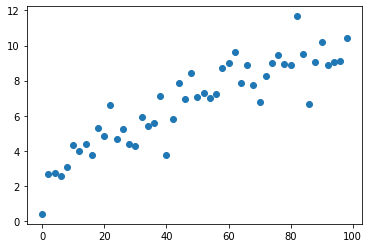

In [5]:
plt.scatter(X,y)

### 🚨 Always scale the data for Regularization

In [6]:
scaler = StandardScaler()

In [8]:
X = scaler.fit_transform(X.reshape(-1,1))

In [10]:
X

array([[-1.69774938],
       [-1.62845348],
       [-1.55915759],
       [-1.4898617 ],
       [-1.4205658 ],
       [-1.35126991],
       [-1.28197402],
       [-1.21267813],
       [-1.14338223],
       [-1.07408634],
       [-1.00479045],
       [-0.93549455],
       [-0.86619866],
       [-0.79690277],
       [-0.72760688],
       [-0.65831098],
       [-0.58901509],
       [-0.5197192 ],
       [-0.4504233 ],
       [-0.38112741],
       [-0.31183152],
       [-0.24253563],
       [-0.17323973],
       [-0.10394384],
       [-0.03464795],
       [ 0.03464795],
       [ 0.10394384],
       [ 0.17323973],
       [ 0.24253563],
       [ 0.31183152],
       [ 0.38112741],
       [ 0.4504233 ],
       [ 0.5197192 ],
       [ 0.58901509],
       [ 0.65831098],
       [ 0.72760688],
       [ 0.79690277],
       [ 0.86619866],
       [ 0.93549455],
       [ 1.00479045],
       [ 1.07408634],
       [ 1.14338223],
       [ 1.21267813],
       [ 1.28197402],
       [ 1.35126991],
       [ 1

### Now let's intentionally overfit a model that focuses too much on training examples.

In [11]:
poly = PolynomialFeatures(degree=20)   # this is a crazy amount of degrees - we really want to overfit 
X_poly = poly.fit_transform(X) 

In [13]:
X_poly.shape  # 20 new features/columns

(50, 21)

In [14]:
m = LinearRegression()
m.fit(X_poly, y)

LinearRegression()

In [15]:
ypred = m.predict(X_poly)

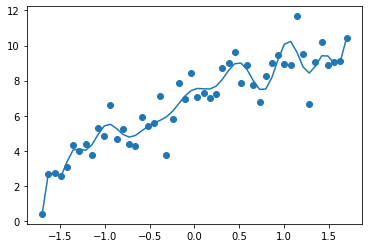

In [17]:
plt.scatter(X, y)
plt.plot(X, ypred)

In [18]:
m.score(X_poly, y)

0.8999874674367774

### Another extreme case:
- Generate similar data but purposely throw in some outliers.

/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/numpy/ma/core.py:2832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  order=order, subok=True, ndmin=ndmin)


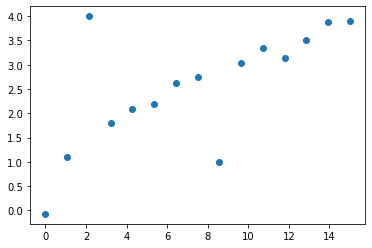

In [19]:
X = np.linspace(0, 15, 15).reshape(-1, 1)
y = [np.sqrt(x_val) + np.random.normal(0,0.1) for x_val in X]

# Create some outliers intentionally:
y[2] = 4
y[8] = 1

plt.scatter(X, y)

## ... and watch how the Linear Regression model overfits
It pays too much attention to single data points.

In [31]:
### Make model unnecessarily complex
poly = PolynomialFeatures(degree=4, include_bias=False)

In [32]:
X_poly = poly.fit_transform(X)

In [33]:
import pandas as pd
pd.DataFrame(X_poly)

,0,1,2,3
0,0.000000,0.000000,0.000000,0.000000
1,1.071429,1.147959,1.229956,1.317810
2,2.142857,4.591837,9.839650,21.084965
3,3.214286,10.331633,33.208819,106.742633
4,4.285714,18.367347,78.717201,337.359434
5,5.357143,28.698980,153.744534,823.631430
6,6.428571,41.326531,265.670554,1707.882132
7,7.500000,56.250000,421.875000,3164.062500
8,8.571429,73.469388,629.737609,5397.750937
9,9.642857,92.984694,896.638120,8646.153296


/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/numpy/ma/core.py:2832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  order=order, subok=True, ndmin=ndmin)


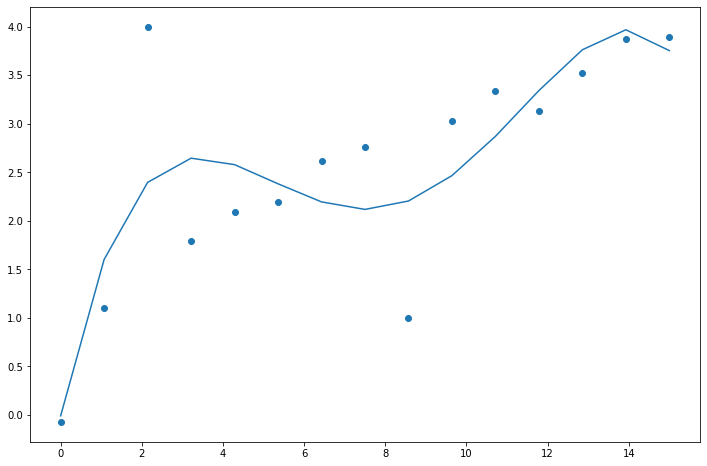

In [20]:
m = LinearRegression() 
m.fit(X_poly, y)  
ypred = m.predict(X_poly)
plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.plot(X, ypred)

## We can reduce this complexity through Regularization

There are three models that we can use for this purpose: 
- Ridge
- Lasso 
- ElasticNet  


/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/envs/std/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-t

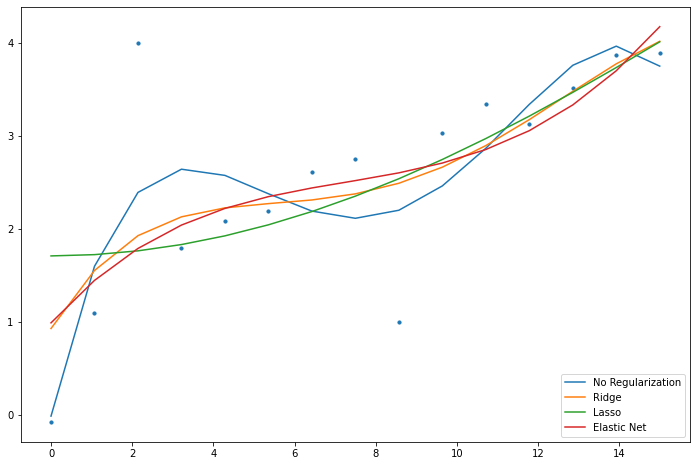

In [28]:
m = LinearRegression() 
m_ridge = Ridge(alpha=2)  
m_lasso = Lasso(alpha=0.5)
m_elastic = ElasticNet(alpha=0.1, l1_ratio=0.2)

m.fit(X_poly, y)       
m_ridge.fit(X_poly, y)  
m_lasso.fit(X_poly, y)  
m_elastic.fit(X_poly, y)  

ypred = m.predict(X_poly)
ypred_ridge = m_ridge.predict(X_poly)
ypred_lasso = m_lasso.predict(X_poly)
ypred_elastic = m_elastic.predict(X_poly)

plt.figure(figsize=(12, 8))
plt.scatter(X, y, s=10)
plt.plot(X, ypred, label='No Regularization')
plt.plot(X, ypred_ridge, label='Ridge')
plt.plot(X, ypred_lasso, label='Lasso')
plt.plot(X, ypred_elastic, label ='Elastic Net')
plt.legend()

---

**Inspect Coefficients**

In [25]:
m.coef_

array([ 0.00000000e+00,  1.98035703e+00, -4.91846706e-01,  4.57296222e-02,
       -1.37506828e-03])

In [26]:
m_ridge.coef_

array([ 0.00000000e+00,  7.25861117e-01, -1.46902272e-01,  1.27492363e-02,
       -3.51096337e-04])

In [27]:
m_lasso.coef_   # some coefficients can be reduced to 0

array([ 0.00000000e+00,  0.00000000e+00,  1.19836100e-02, -3.09004031e-05,
       -5.71289061e-06])

Good visual explanation of why Ridge doesn't shrink coefficients to 0, but Lasso does: 
https://www.youtube.com/watch?v=Xm2C_gTAl8c

# Exercise: 🚲 🚲 🚲 

Try Ridge, Lasso or ElasticNet on your bicycle project.